### Importing and Initial Preping of Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
sc=StandardScaler()

In [3]:
bf=data = pd.read_csv('BlackFridaySalesResized.csv')

In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     159999 non-null  int64  
 1   Product_ID                  159999 non-null  object 
 2   Gender                      159999 non-null  object 
 3   Age                         159999 non-null  object 
 4   Occupation                  159999 non-null  int64  
 5   City_Category               159999 non-null  object 
 6   Stay_In_Current_City_Years  159999 non-null  object 
 7   Marital_Status              159999 non-null  int64  
 8   Product_Category_1          159999 non-null  int64  
 9   Product_Category_2          110328 non-null  float64
 10  Product_Category_3          48940 non-null   float64
 11  Purchase                    159999 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 14.6+ MB


In [5]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
missing_values = bf.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/bf.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.412309
Product_Category_2    31.044569
dtype: float64 %


In [7]:
bf.fillna(0,inplace=True)

In [8]:
bf['Age']=bf['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))

In [9]:
bf=pd.get_dummies(data=bf,columns=['Gender','City_Category'],drop_first=True)

In [10]:
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
bf["Stay_In_Current_City_Years"]=bf["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [11]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     159999 non-null  int64  
 1   Product_ID                  159999 non-null  object 
 2   Age                         159999 non-null  int64  
 3   Occupation                  159999 non-null  int64  
 4   Stay_In_Current_City_Years  159999 non-null  int64  
 5   Marital_Status              159999 non-null  int64  
 6   Product_Category_1          159999 non-null  int64  
 7   Product_Category_2          159999 non-null  float64
 8   Product_Category_3          159999 non-null  float64
 9   Purchase                    159999 non-null  int64  
 10  Gender_M                    159999 non-null  uint8  
 11  City_Category_B             159999 non-null  uint8  
 12  City_Category_C             159999 non-null  uint8  
dtypes: float64(2),

In [12]:
#dropping columns which have all the unique values
bf.drop(columns=['User_ID','Product_ID'],inplace=True)

In [13]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159999 entries, 0 to 159998
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         159999 non-null  int64  
 1   Occupation                  159999 non-null  int64  
 2   Stay_In_Current_City_Years  159999 non-null  int64  
 3   Marital_Status              159999 non-null  int64  
 4   Product_Category_1          159999 non-null  int64  
 5   Product_Category_2          159999 non-null  float64
 6   Product_Category_3          159999 non-null  float64
 7   Purchase                    159999 non-null  int64  
 8   Gender_M                    159999 non-null  uint8  
 9   City_Category_B             159999 non-null  uint8  
 10  City_Category_C             159999 non-null  uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 10.2 MB


## K-Means

In [14]:
from scipy.stats import zscore
X_scaled = bf.apply(zscore)

In [15]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1.759989e+06
1,2,1.545953e+06
2,3,1.410590e+06
3,4,1.322448e+06
4,5,1.254138e+06
5,6,1.200812e+06
6,7,1.160123e+06
7,8,1.122029e+06
8,9,1.096952e+06
9,10,1.064723e+06


### K means using elbow method

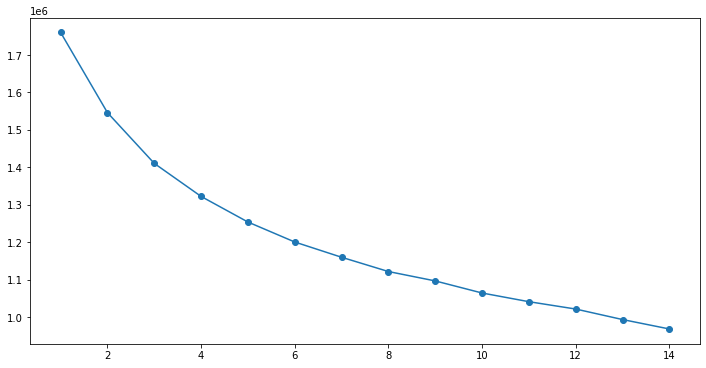

In [16]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)

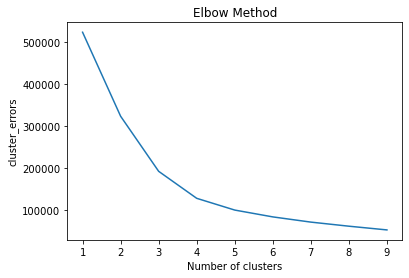

In [18]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
cluster_errors = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(X_pca)
    cluster_errors.append(kmeans.inertia_)
plt.plot(range(1,10), cluster_errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('cluster_errors')
plt.show()

In [23]:
print("The centroids are ", kmeans.cluster_centers_)

print("Assignments are: ")
print(kmeans.labels_)

The centroids are  [[ 0.17775884  1.6843552 ]
 [ 1.1812057  -0.36305704]
 [-1.96587747  0.72173861]
 [-0.84847918 -1.33524057]]
Assignments are: 
[1 3 1 ... 0 0 0]
